# Agregación de datos por categoría

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(400)

In [3]:
gender = ["Male","Female"]
income = ["Poor","Middle class","Rich"]

In [4]:
n = 500
gender_data = []
income_data = []

for i in range(500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
height  = np.random.normal(160, 30, n)
weight  = np.random.normal(65, 25, n)
age     = np.random.normal(30, 12, n)
income  = np.random.normal(18000, 3500, n)

In [6]:
data = pd.DataFrame({
    "Gender": gender_data,
    "Econ status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
})

In [7]:
age = np.around(age, 0) # Redondeado a entero
data['Age'] = age

In [8]:
data.head()

,Gender,Econ status,Height,Weight,Age,Income
0,Male,Rich,160.822157,57.025266,41.0,17335.735914
1,Female,Poor,118.535276,49.838027,24.0,14382.895803
2,Female,Rich,179.118840,96.199278,16.0,15292.222806
3,Female,Poor,190.911247,46.029872,16.0,14136.529206
4,Female,Rich,138.803142,42.699379,22.0,17169.348901


## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender") # Nuevo tipo de objeto con name y group (2 atributos)

In [10]:
grouped_gender.groups

{'Female': [1, 2, 3, 4, 5, 6, 7, 8, 11, 14, 15, 17, 18, 20, 22, 23, 24, 25, 29, 30, 33, 34, 35, 37, 38, 48, 50, 53, 57, 58, 61, 62, 64, 65, 68, 69, 70, 71, 77, 78, 81, 85, 86, 87, 88, 90, 92, 94, 97, 100, 101, 102, 103, 104, 105, 107, 114, 115, 117, 118, 119, 121, 125, 126, 131, 132, 136, 137, 139, 141, 142, 143, 144, 145, 150, 151, 154, 155, 156, 157, 158, 159, 161, 163, 166, 169, 173, 176, 177, 178, 181, 182, 186, 187, 191, 192, 194, 195, 198, 199, ...], 'Male': [0, 9, 10, 12, 13, 16, 19, 21, 26, 27, 28, 31, 32, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 54, 55, 56, 59, 60, 63, 66, 67, 72, 73, 74, 75, 76, 79, 80, 82, 83, 84, 89, 91, 93, 95, 96, 98, 99, 106, 108, 109, 110, 111, 112, 113, 116, 120, 122, 123, 124, 127, 128, 129, 130, 133, 134, 135, 138, 140, 146, 147, 148, 149, 152, 153, 160, 162, 164, 165, 167, 168, 170, 171, 172, 174, 175, 179, 180, 183, 184, 185, 188, 189, 190, 193, 196, 197, ...]}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender   Econ status      Height      Weight   Age        Income
1    Female          Poor  118.535276   49.838027  24.0  14382.895803
2    Female          Rich  179.118840   96.199278  16.0  15292.222806
3    Female          Poor  190.911247   46.029872  16.0  14136.529206
4    Female          Rich  138.803142   42.699379  22.0  17169.348901
5    Female          Rich  118.762097  103.858444  20.0  16301.251215
..      ...           ...         ...         ...   ...           ...
488  Female          Rich  171.213363   46.057194  42.0  17620.175188
489  Female          Poor  188.453219   20.506269  32.0  16025.311616
493  Female  Middle class  190.515193   55.928509  27.0  13474.178560
497  Female          Rich  148.063668   63.709417  16.0  16207.919536
499  Female          Poor  186.416826   81.239561  26.0  12707.928444

[242 rows x 6 columns]
Male
    Gender   Econ status      Height      Weight   Age        Income
0     Male          Rich  160.822157   57.025266  41.0 

In [12]:
grouped_gender.get_group("Female")

,Gender,Econ status,Height,Weight,Age,Income
1,Female,Poor,118.535276,49.838027,24.0,14382.895803
2,Female,Rich,179.118840,96.199278,16.0,15292.222806
3,Female,Poor,190.911247,46.029872,16.0,14136.529206
4,Female,Rich,138.803142,42.699379,22.0,17169.348901
5,Female,Rich,118.762097,103.858444,20.0,16301.251215
...,...,...,...,...,...,...
488,Female,Rich,171.213363,46.057194,42.0,17620.175188
489,Female,Poor,188.453219,20.506269,32.0,16025.311616
493,Female,Middle class,190.515193,55.928509,27.0,13474.178560
497,Female,Rich,148.063668,63.709417,16.0,16207.919536


In [13]:
double_group = data.groupby(["Gender","Econ status"])

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle class')
     Gender   Econ status      Height     Weight   Age        Income
8    Female  Middle class  187.218614  75.959377  20.0  19419.247681
11   Female  Middle class  175.852741  49.693716  45.0  19103.206279
14   Female  Middle class  113.597727  58.171105  39.0  20022.541621
17   Female  Middle class   96.125539  86.532933  25.0  18668.527264
20   Female  Middle class  104.485223  77.333279  19.0  19985.706013
..      ...           ...         ...        ...   ...           ...
456  Female  Middle class  157.595173  70.876727  31.0  20159.190038
475  Female  Middle class  121.408985  99.833190  43.0  18510.897753
477  Female  Middle class  160.722619  56.189474  12.0  18742.913930
479  Female  Middle class  160.322797  57.714766  60.0  21428.157362
493  Female  Middle class  190.515193  55.928509  27.0  13474.178560

[75 rows x 6 columns]
('Female', 'Poor')
     Gender Econ status      Height     Weight   Age        Income
1    Female        Poor  118.535276 

In [15]:
double_group.get_group(("Male","Rich"))

,Gender,Econ status,Height,Weight,Age,Income
0,Male,Rich,160.822157,57.025266,41.0,17335.735914
12,Male,Rich,144.395691,73.404137,12.0,15982.058526
16,Male,Rich,176.539432,86.060798,-6.0,21001.890105
21,Male,Rich,136.071603,75.706153,32.0,20427.338814
26,Male,Rich,161.726166,68.975680,29.0,18322.907448
...,...,...,...,...,...,...
490,Male,Rich,172.989241,71.834108,44.0,20577.454569
491,Male,Rich,207.769863,-20.557822,-0.0,27744.911020
492,Male,Rich,145.685303,59.148074,54.0,16676.249803
494,Male,Rich,152.446332,75.877344,38.0,16976.599361


## Operaciones sobre datos agrupados

In [16]:
(double_group.mean()-double_group.median())/double_group.median()*100

Height    Weight       Age    Income
Gender Econ status                                         
Female Middle class -0.060922  0.315823  5.679012  0.699504
       Poor          0.158040  2.549790  0.505247 -0.388632
       Rich         -2.226135  3.566650  0.040355  0.979963
Male   Middle class  1.224206 -5.903223 -6.512605  3.536059
       Poor         -0.208125  1.304426  4.553571  0.529929
       Rich          1.839814 -0.568249 -8.800774  0.384677

In [17]:
double_group.describe()

Height                                                 \
                     count        mean        std         min         25%   
Gender Econ status                                                          
Female Middle class   75.0  161.128446  31.894401   83.057974  142.331277   
       Poor           83.0  155.219534  28.606825   82.876837  135.225500   
       Rich           84.0  163.478953  27.723079  104.171726  144.005546   
Male   Middle class   84.0  160.060436  31.819045   79.497459  138.651410   
       Poor           80.0  157.613261  30.685900  101.746612  135.519863   
       Rich           94.0  157.678391  28.450344   92.352511  137.171109   

                                                        Weight             \
                            50%         75%         max  count       mean   
Gender Econ status                                                          
Female Middle class  161.226668  176.618578  252.563212   75.0  67.631516   
       Poor          154.974612  176.471019  229.599126   83.0  60.737108   
       Rich          167.201074  179.865616  227.607695   84.0  62.779474   
Male   Middle class  158.124665  182.511186  229.932891   84.0  62.548809   
       Poor          157.941978  175.296199  257.672613   80.0  64.484223   
       Rich          154.829810  177.377235  229.312651   94.0  62.683088   

                     ...    Age       Income                             \
                     ...    75%   max  count          mean          std   
Gender Econ status   ...                                                  
Female Middle class  ...  36.50  60.0   75.0  18048.738202  3375.029995   
       Poor          ...  39.00  61.0   83.0  17719.052240  3755.872024   
       Rich          ...  36.00  53.0   84.0  17715.030431  3185.363117   
Male   Middle class  ...  41.00  68.0   84.0  17861.859328  3620.934167   
       Poor          ...  39.00  57.0   80.0  17686.435148  3166.176378   
       Rich          ...  39.75  55.0   94.0  18215.306982  3124.929988   

                                                                             \
                              min           25%           50%           75%   
Gender Econ status                                                            
Female Middle class   8994.529231  15731.660391  17923.363510  20147.359883   
       Poor           9635.357210  14668.173615  17788.182859  20542.486340   
       Rich          10167.900808  15501.775818  17543.114466  20002.240536   
Male   Middle class  12062.897392  15217.073836  17251.824604  20363.261013   
       Poor          10189.287884  15625.648764  17593.203605  20009.138980   
       Rich          12368.887731  15892.222340  18145.505479  20495.512829   

                                   
                              max  
Gender Econ status                 
Female Middle class  25962.112018  
       Poor          26693.552233  
       Rich          25854.481717  
Male   Middle class  25547.671182  
       Poor          24515.127889  
       Rich          27744.911020  

[6 rows x 32 columns]

In [18]:
grouped_income = double_group["Income"]

In [19]:
grouped_income.describe()

count          mean          std           min  \
Gender Econ status                                                    
Female Middle class   75.0  18048.738202  3375.029995   8994.529231   
       Poor           83.0  17719.052240  3755.872024   9635.357210   
       Rich           84.0  17715.030431  3185.363117  10167.900808   
Male   Middle class   84.0  17861.859328  3620.934167  12062.897392   
       Poor           80.0  17686.435148  3166.176378  10189.287884   
       Rich           94.0  18215.306982  3124.929988  12368.887731   

                              25%           50%           75%           max  
Gender Econ status                                                           
Female Middle class  15731.660391  17923.363510  20147.359883  25962.112018  
       Poor          14668.173615  17788.182859  20542.486340  26693.552233  
       Rich          15501.775818  17543.114466  20002.240536  25854.481717  
Male   Middle class  15217.073836  17251.824604  20363.261013  25547.671182  
       Poor          15625.648764  17593.203605  20009.138980  24515.127889  
       Rich          15892.222340  18145.505479  20495.512829  27744.911020

In [20]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Econ status                                     
Female Middle class  1.353655e+06  28.533333  31.894401
       Poor          1.470681e+06  31.156627  28.606825
       Rich          1.488063e+06  29.511905  27.723079
Male   Middle class  1.500396e+06  31.785714  31.819045
       Poor          1.414915e+06  29.275000  30.685900
       Rich          1.712239e+06  30.095745  28.450344

In [21]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Econ status                      
Female Middle class  28.533333  5.085955
       Poor          31.156627  5.458946
       Rich          29.511905  5.932271
Male   Middle class  31.785714  5.060547
       Poor          29.275000  5.168748
       Rich          30.095745  5.571949

In [22]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                     <lambda>  <lambda>  <lambda>  <lambda>
Gender Econ status                                         
Female Middle class  5.085955  2.841353  2.547529  5.383739
       Poor          5.458946  2.658216  2.445990  4.746373
       Rich          5.932271  2.466931  2.884159  5.594787
Male   Middle class  5.060547  2.543926  2.552880  4.962570
       Poor          5.168748  2.479810  2.463005  5.621299
       Rich          5.571949  2.594706  2.132511  5.860284

## Filtrado de datos

In [23]:
double_group["Age"].filter(lambda x: x.sum() > 2400) # Elementos del grupo filtrado

0      41.0
1      24.0
2      16.0
3      16.0
4      22.0
       ... 
494    38.0
495    11.0
497    16.0
498    32.0
499    26.0
Name: Age, Length: 345, dtype: float64

## Transformación de variables

In [24]:
zscore = lambda x : (x - x.mean())/x.std()

In [25]:
z_group = double_group.transform(zscore)

Text(0.5, 1.0, 'Histograma')

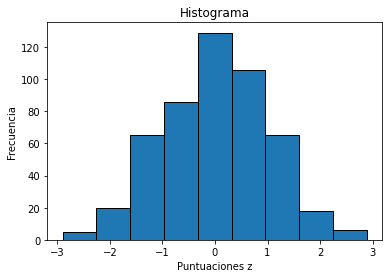

In [26]:
plt.hist(z_group["Age"], edgecolor = "black", bins = int(1 + np.log2(n)))
plt.xlabel("Puntuaciones z")
plt.ylabel("Frecuencia")
plt.title("Histograma")

In [27]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [28]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,160.822157,57.025266,41.0,17335.735914
1,118.535276,49.838027,24.0,14382.895803
2,179.118840,96.199278,16.0,15292.222806
3,190.911247,46.029872,16.0,14136.529206
4,138.803142,42.699379,22.0,17169.348901
...,...,...,...,...
495,109.510755,58.793464,11.0,21734.589603
496,137.944893,59.720380,16.0,16805.447833
497,148.063668,63.709417,16.0,16207.919536
498,121.198721,97.255032,32.0,20273.156390


## Operaciones diversas muy útiles

In [29]:
double_group.head(1)

,Gender,Econ status,Height,Weight,Age,Income
0,Male,Rich,160.822157,57.025266,41.0,17335.735914
1,Female,Poor,118.535276,49.838027,24.0,14382.895803
2,Female,Rich,179.118840,96.199278,16.0,15292.222806
8,Female,Middle class,187.218614,75.959377,20.0,19419.247681
9,Male,Middle class,182.474941,104.999465,47.0,24131.241757
10,Male,Poor,167.059951,101.853582,47.0,16656.915699


In [30]:
double_group.tail(1)

,Gender,Econ status,Height,Weight,Age,Income
493,Female,Middle class,190.515193,55.928509,27.0,13474.178560
495,Male,Middle class,109.510755,58.793464,11.0,21734.589603
496,Male,Poor,137.944893,59.720380,16.0,16805.447833
497,Female,Rich,148.063668,63.709417,16.0,16207.919536
498,Male,Rich,121.198721,97.255032,32.0,20273.156390
499,Female,Poor,186.416826,81.239561,26.0,12707.928444


In [31]:
double_group.nth(80) # No hay suficiente información

Height     Weight   Age        Income
Gender Econ status                                            
Female Poor          108.292490  91.058367  -6.0  19822.038855
       Rich          116.793252  85.046288  29.0  19867.077250
Male   Middle class  152.127947  29.915353  22.0  19262.981580
       Rich          164.579863  91.620203  26.0  18421.500501

In [32]:
data_sorted = data.sort_values(["Age","Income"]) 

In [33]:
age_grouped = data_sorted.groupby("Gender")

In [34]:
age_grouped.head()

,Gender,Econ status,Height,Weight,Age,Income
487,Female,Poor,108.292490,91.058367,-6.0,19822.038855
16,Male,Rich,176.539432,86.060798,-6.0,21001.890105
393,Female,Middle class,191.193986,48.062004,0.0,14462.221388
301,Male,Rich,140.133576,58.810423,0.0,15889.708874
128,Male,Rich,166.720272,32.316848,0.0,21985.861417
491,Male,Rich,207.769863,-20.557822,-0.0,27744.911020
442,Female,Middle class,137.909671,84.127088,1.0,17434.999350
435,Male,Rich,190.902682,46.448641,3.0,13679.244186
104,Female,Rich,159.290973,42.511414,5.0,15374.656748
119,Female,Poor,156.041700,45.992185,7.0,18288.603446


In [35]:
age_grouped.tail(2)

,Gender,Econ status,Height,Weight,Age,Income
321,Male,Middle class,104.407602,71.290247,60.0,18808.686962
479,Female,Middle class,160.322797,57.714766,60.0,21428.157362
69,Female,Poor,195.863453,44.957746,61.0,12834.843833
389,Male,Middle class,188.085103,17.624354,68.0,16985.301279


## Conjunto de entrenamiento y conjunto de testing

In [36]:
data = pd.read_csv("../../datasets/customer-churn-model/Customer Churn Model.txt")

### Dividir utilizando la distribución normal

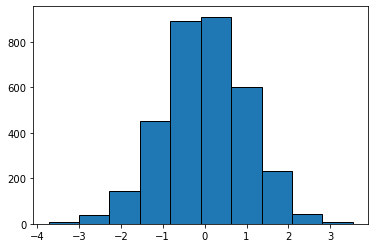

In [46]:
a = np.random.randn(len(data))
plt.hist(a, edgecolor = "black")
plt.show()

In [49]:
check = (a < 0.8)

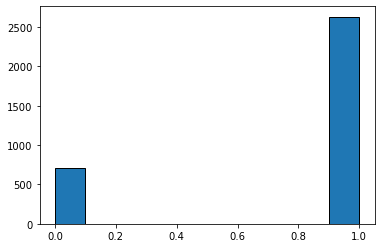

In [52]:
plt.hist(check.astype(int), edgecolor = "black")
plt.show()

In [40]:
training = data[check]
testing  = data[~check]

In [74]:
print("Training contiene {} filas, el {:.2f}% del total de los datos.".format(len(training),len(training)/len(data)*100),
      "Testing contiene {} filas, el {:.2f}% del total de los datos.".format(len(testing),len(testing)/len(data)*100),
      sep = "\n")

Training contiene 2607 filas, el 78.22% del total de los datos.
Testing contiene 726 filas, el 21.78% del total de los datos.


## Utilizando la librería sklearn

In [42]:
from sklearn.model_selection import train_test_split # Paquete para samplear

In [75]:
train, test = train_test_split(data, test_size = 0.2)

In [76]:
print("Longitud del training:{}".format(len(training)),
      "Longitud del testing:{}".format(len(testing)),
      sep = "\n")

Longitud del training:2607
Longitud del testing:726


## Usando una función de shuffle

In [77]:
import sklearn
data = sklearn.utils.shuffle(data)

In [89]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data  = data[cut_id:]